This script filters the table produced by *rawtweet_analysis* to produce the relevant plots as well as the linear regression analysis.

# Analysis of released films




#### This analysis looks at box office performance of movies that had been released.
#### movies with negative "days since release", that is, not yet released, are not included in the analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv('analysis_results/all_data.csv')
df["box office"] = df["box office"]/1000

# filter out only rows where "days since release" greater or equal to 0
released = df.loc[df["days since release"]>=0, :].reset_index(drop = True)
released.to_csv('analysis_results/released_only.csv', index=False, header=True)

# add a column to the table marking numbers of weeks a movie has been released, 
# anything more than 8 weeks are binned as 8+ weeks
week_cutoff = [-1, 6, 13, 20, 27, 34, 41, 48, 55, 150]
week = list(range(9))
released["weeks since release"] = pd.cut(released["days since release"], week_cutoff, labels=week)
released.tail()

,day,daily tweet count,day of week,title,box office,days since release,weekend,star,theaters,weeks since release
457,35,26,5,nevergoinback,3.164,1,1,11547,2,0
458,36,5,6,nevergoinback,2.878,2,1,11547,2,0
459,34,517,4,TheSpyWhoDumpedMe,5011.316,0,1,858,3111,0
460,35,441,5,TheSpyWhoDumpedMe,4101.508,1,1,858,3111,0
461,36,365,6,TheSpyWhoDumpedMe,2990.219,2,1,858,3111,0


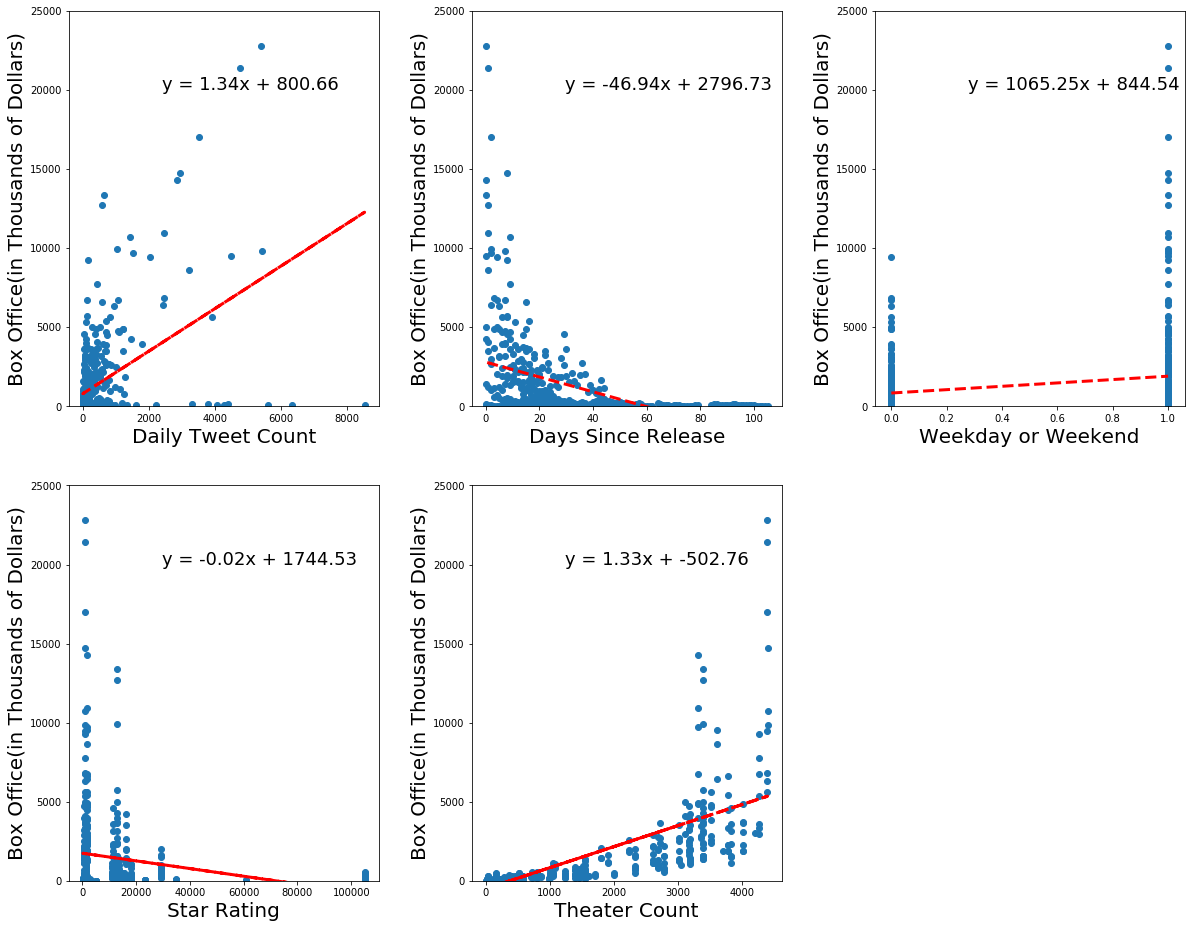

In [2]:
#exploratory graphs
fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

x1 = released["daily tweet count"]
x2 = released["days since release"]
x3 = released["weekend"]
x4 = released["star"]
x5 = released["theaters"]
y = released["box office"]

def exploratoryplots(ax, x, y, axistitle):
    ax.scatter(x,y)
    fit = np.polyfit(x, y, 1)
    p = np.poly1d(fit)
    ax.plot(x,p(x),"r--",lw=3)
    eq = "y = %.2fx + %.2f"%(fit[0],fit[1])
    ax.text(0.3,0.8,eq,transform=ax.transAxes, fontsize = 18)
    ax.set_xlabel(axistitle, fontsize = 20)
    ax.set_ylabel("Box Office(in Thousands of Dollars)", fontsize = 20)
    ax.set_ylim([0, 25000])

exploratoryplots(ax1, x1, y, 'Daily Tweet Count')
exploratoryplots(ax2, x2, y, 'Days Since Release')
exploratoryplots(ax3, x3, y, 'Weekday or Weekend')
exploratoryplots(ax4, x4, y, 'Star Rating')
exploratoryplots(ax5, x5, y, 'Theater Count')
plt.subplots_adjust(hspace=0.2, wspace=0.3)

plt.savefig('analysis_results/exploratory_plots.png')

In [3]:
def regression_allpredicators(df):
    y = df['box office']
    X = df[['daily tweet count', 'days since release', 'weekend', 'star', 'theaters']]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return (model)
    
regression_allpredicators(released).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box office   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     162.5
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           6.59e-99
Time:                        12:46:54   Log-Likelihood:                -4072.3
No. Observations:                 462   AIC:                             8157.
Df Residuals:                     456   BIC:                             8181.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -574.5470    243.603     -2.359      0.019   -1053.271     -95.823
daily tweet count      1.0405      0.086     12.085      0.000       0.871       1.210
days since release   -16.3149      4.004     -4.074      0.000     -24.184      -8.445
weekend              884.5283    154.236      5.735      0.000     581.427    1187.630
star                   0.0024      0.004      0.678      0.498      -0.005       0.009
theaters               1.0660      0.070     15.166      0.000       0.928       1.204
==============================================================================
Omnibus:                      326.264   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6588.792
Skew:                           2.763   Prob(JB):                         0.00
Kurtosis:                      20.656   Cond. No.                     9.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Star is not significant. Removed from following analyses

In [4]:
def regression(df):
    y = df['box office']
    X = df[['daily tweet count', 'days since release', 'weekend', 'theaters']]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return (model)

regression(released).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box office   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 07 Aug 2018   Prob (F-statistic):          5.46e-100
Time:                        12:46:54   Log-Likelihood:                -4072.6
No. Observations:                 462   AIC:                             8155.
Df Residuals:                     457   BIC:                             8176.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -499.7857    217.094     -2.302      0.022    -926.412     -73.160
daily tweet count      1.0365      0.086     12.074      0.000       0.868       1.205
days since release   -16.7784      3.943     -4.255      0.000     -24.528      -9.029
weekend              879.6515    153.977      5.713      0.000     577.060    1182.242
theaters               1.0513      0.067     15.733      0.000       0.920       1.183
==============================================================================
Omnibus:                      327.007   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6630.653
Skew:                           2.770   Prob(JB):                         0.00
Kurtosis:                      20.713   Cond. No.                     6.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

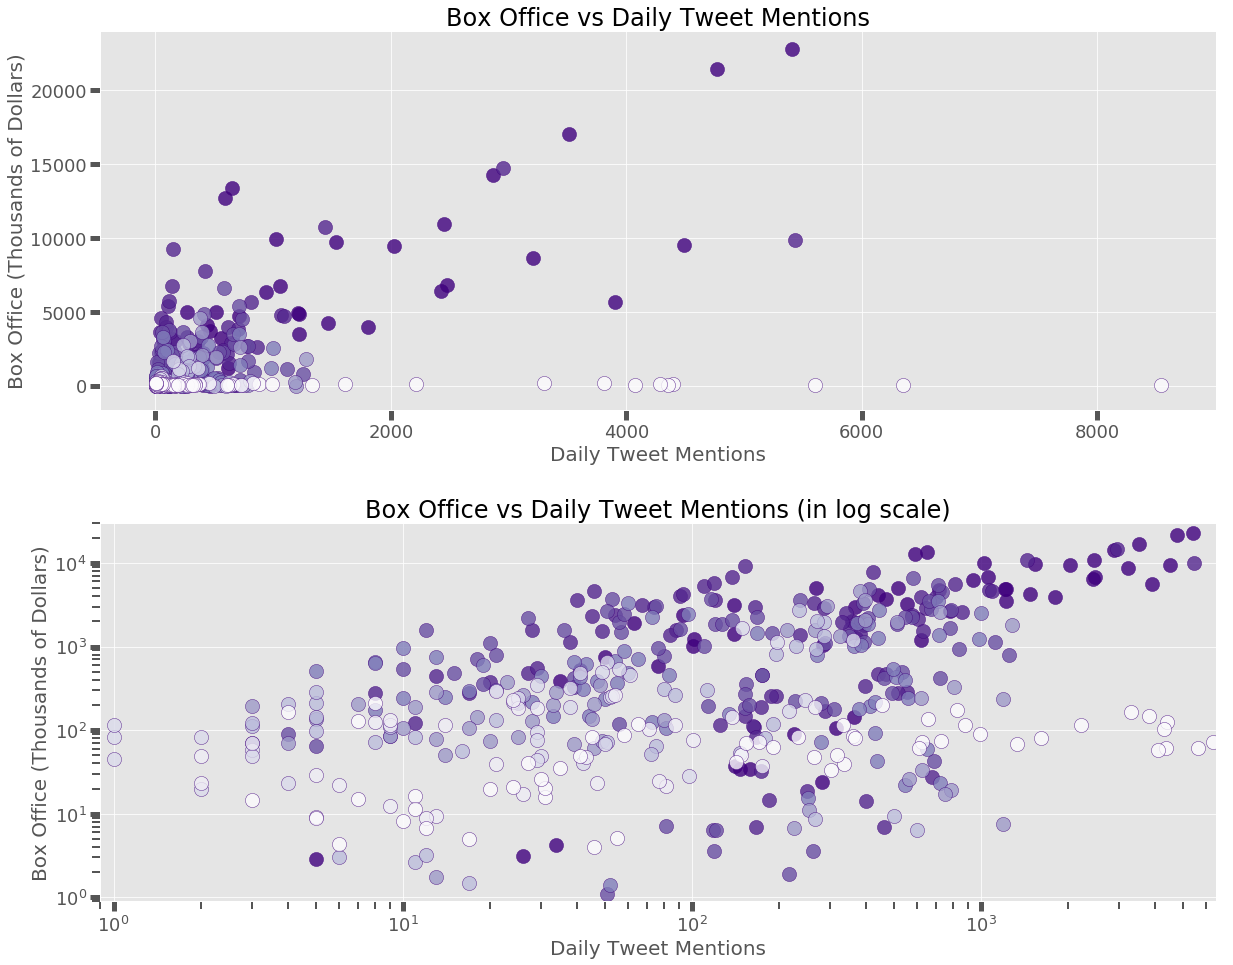

In [5]:
plt.style.use('ggplot')

# Make a list of colors to be used for the scatter plot. Data points for newer movies have darker color
colorlist = ["#3f007d","#54278f","#6a51a3","#807dba","#9e9ac8","#bcbddc","#dadaeb","#efedf5","#fcfbfd"]

fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# A function that takes in the subplot handle and formats the subplot
def figformat(ax, title):
    ax.set_xlabel('Daily Tweet Mentions', fontsize = 20)
    ax.set_ylabel('Box Office (Thousands of Dollars)', fontsize = 20)
    ax.set_title(title, fontsize = 24)
    ax.tick_params(axis='both', length = 10, width = 5, labelsize = 18)
    ax.tick_params(axis='both', which = "minor", length = 8, width = 2)
    
def figformat2(ax):
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.set_xlim(0.9, 6500)
    ax.set_ylim(0.9, 30000)

# Plot the data points for one week at a time
for i in range(9):
    weekly = released.loc[(released["weeks since release"] == i) , :].reset_index(drop= True)
    x = weekly["daily tweet count"]
    y = weekly["box office"]
    color = colorlist[i]
     
    ax1.scatter(x, y, c = color, edgecolor = "#3f007d", s = 200, alpha = 0.8)
    ax2.scatter(x, y, c = color, edgecolor = "#3f007d", s = 200, alpha = 0.8)

figformat(ax1, "Box Office vs Daily Tweet Mentions")
figformat(ax2, "Box Office vs Daily Tweet Mentions (in log scale)")
figformat2(ax2)

plt.subplots_adjust(hspace=0.3)
plt.savefig('analysis_results/all_released_scatterplot.png')

#### In the above analysis, visually examining the scatter plot show outliers that have been in theater for a long time (light color circles) and thus weak box office performances, but continue to garner twitter mentions.  
#### A box plot is used to explore the possiblity those films are outliers. The below boxplot looks at the number of days movies have been out for, as of August 4th, 2018.

In [6]:
releasedate = pd.read_csv('input/releasedate.csv')
releasedate = releasedate.set_index("title")

releasedate["Days Since Release"] = 36 - releasedate["Opening Date"] #Day 1 is July 1st, August 5th is Day 36
releasedate.head()

,Opening Date,Days Since Release
title,,
RampageMovie,-79,115
InfinityWar,-64,100
Deadpool2,-43,79
AdriftMovie,-29,65
Hereditary,-22,58


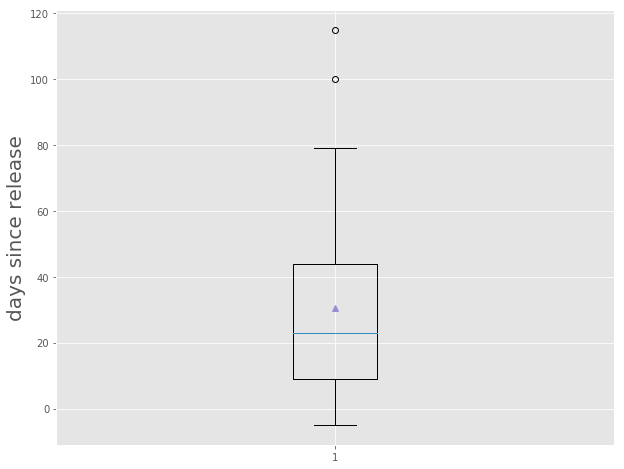

In [7]:
dataset = releasedate["Days Since Release"]
fig = plt.figure(figsize = (10,8))
plt.boxplot(dataset, showmeans=True) 
plt.ylabel('days since release',fontsize = 20)

plt.savefig('analysis_results/days_since_release_boxplot.png')

plt.show()

#### The box plot shows that the two films that had been out the longest *Rampage* and *The Avengers: Infinity War*, are outliers in terms out of days out in theater.
    
#### Highlighting the data points for those two movies in the scatter plot confirms they are the outliers in the tweet mention and box office correlation.

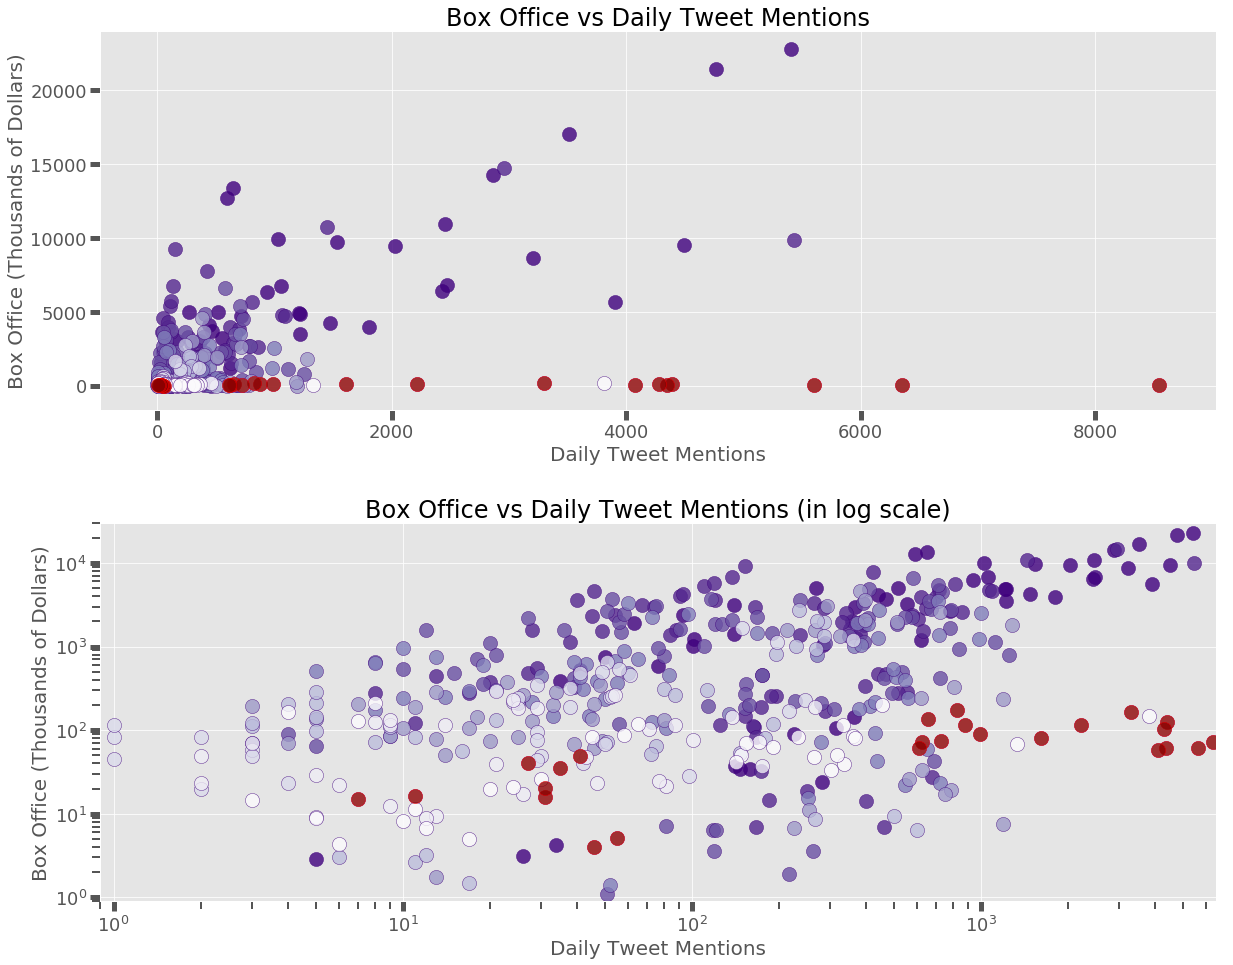

In [8]:
rampage_infinity = released.loc[released["title"].isin (["RampageMovie","InfinityWar"])].reset_index(drop = True)

fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Plot the data points for one week at a time
for i in range(9):
    weekly = released.loc[(released["weeks since release"] == i) , :].reset_index(drop= True)
    x = weekly["daily tweet count"]
    y = weekly["box office"]
    color = colorlist[i]
     
    ax1.scatter(x, y, c = color, edgecolor = "#3f007d", s = 200, alpha = 0.8)
    ax2.scatter(x, y, c = color, edgecolor = "#3f007d", s = 200, alpha = 0.8)

x = rampage_infinity["daily tweet count"]
y = rampage_infinity["box office"]
ax1.scatter(x, y, c = "#8B0000", edgecolor = "#FF0000", s = 200, alpha = 0.8)
ax2.scatter(x, y, c = "#8B0000", edgecolor = "#FF0000", s = 200, alpha = 0.8)    

figformat(ax1, "Box Office vs Daily Tweet Mentions")
figformat(ax2, "Box Office vs Daily Tweet Mentions (in log scale)")
figformat2(ax2)

plt.subplots_adjust(hspace=0.3)
plt.savefig('analysis_results/all_released_scatterplot_highlight_outliers.png')

In [9]:
no_outliers = released.loc[~released["title"].isin (["RampageMovie","InfinityWar"])].reset_index(drop = True)
regression(no_outliers).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box office   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     311.1
Date:                Tue, 07 Aug 2018   Prob (F-statistic):          1.41e-125
Time:                        12:46:57   Log-Likelihood:                -3779.8
No. Observations:                 436   AIC:                             7570.
Df Residuals:                     431   BIC:                             7590.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -865.1197    207.837     -4.162      0.000   -1273.620    -456.619
daily tweet count      2.0820      0.109     19.033      0.000       1.867       2.297
days since release    -5.5652      4.504     -1.236      0.217     -14.417       3.287
weekend              761.6472    137.643      5.533      0.000     491.111    1032.183
theaters               0.9160      0.059     15.403      0.000       0.799       1.033
==============================================================================
Omnibus:                      221.567   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3703.379
Skew:                           1.759   Prob(JB):                         0.00
Kurtosis:                      16.837   Cond. No.                     6.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### By removing *Rampage* and *The Avengers: Infinity War*, R-squared improved from 0.486 to 0.609.

#### It can be reasoned that these two films have been in theater for an unusually long amount of time because their box office overall performed exceptionally well and received ample amounts of attention. 

#### Additionally, both films are based on already established franchises, so it's likely that the fanbase continue to mention the movie's hashtag in tweets in discussions not directly related to seeing the movie itself. (e.g. Cosplay or Marvel giveaway.)

#### To explore the possibility that movies that had in theater for a long time have weaker correlation between tweeter mentions and box office, regression analysis were repeated for films released less than 5 weeks.

In [10]:
print(f"all released films: r-squared = {regression(released).rsquared}")
print(f"released films excluding Infinity War & Rampage: r-squared = {regression(no_outliers).rsquared}")

sevenweeks = released.loc[released["days since release"]<=48, :]
print(f"films less than 7 weeks old: r-squared = {regression(sevenweeks).rsquared}")

sixweeks = released.loc[released["days since release"]<=41, :]
print(f"films less than 6 weeks old: r-squared = {regression(sixweeks).rsquared}")

fiveweeks = released.loc[released["days since release"]<=34, :]
print(f"films less than 5 weeks old: r-squared = {regression(fiveweeks).rsquared}")

fourweeks = released.loc[released["days since release"]<=27, :]
print(f"films less than 4 weeks old: r-squared = {regression(fourweeks).rsquared}")

all released films: r-squared = 0.6401680843765727
released films excluding Infinity War & Rampage: r-squared = 0.7427221280970135
films less than 7 weeks old: r-squared = 0.7607113766387508
films less than 6 weeks old: r-squared = 0.762676089024757
films less than 5 weeks old: r-squared = 0.7623856399712363
films less than 4 weeks old: r-squared = 0.7686866741828104


#### R-squared for regression including films 7 weeks old or newer improved comparing to just taking out *Infinity War* and *Rampage*. However, from week 7 and on, excluding older films does not change R-squared notably.

#### Below is the scatter plot of twitter mentions and box office performs of films 7 weeks old or newer 

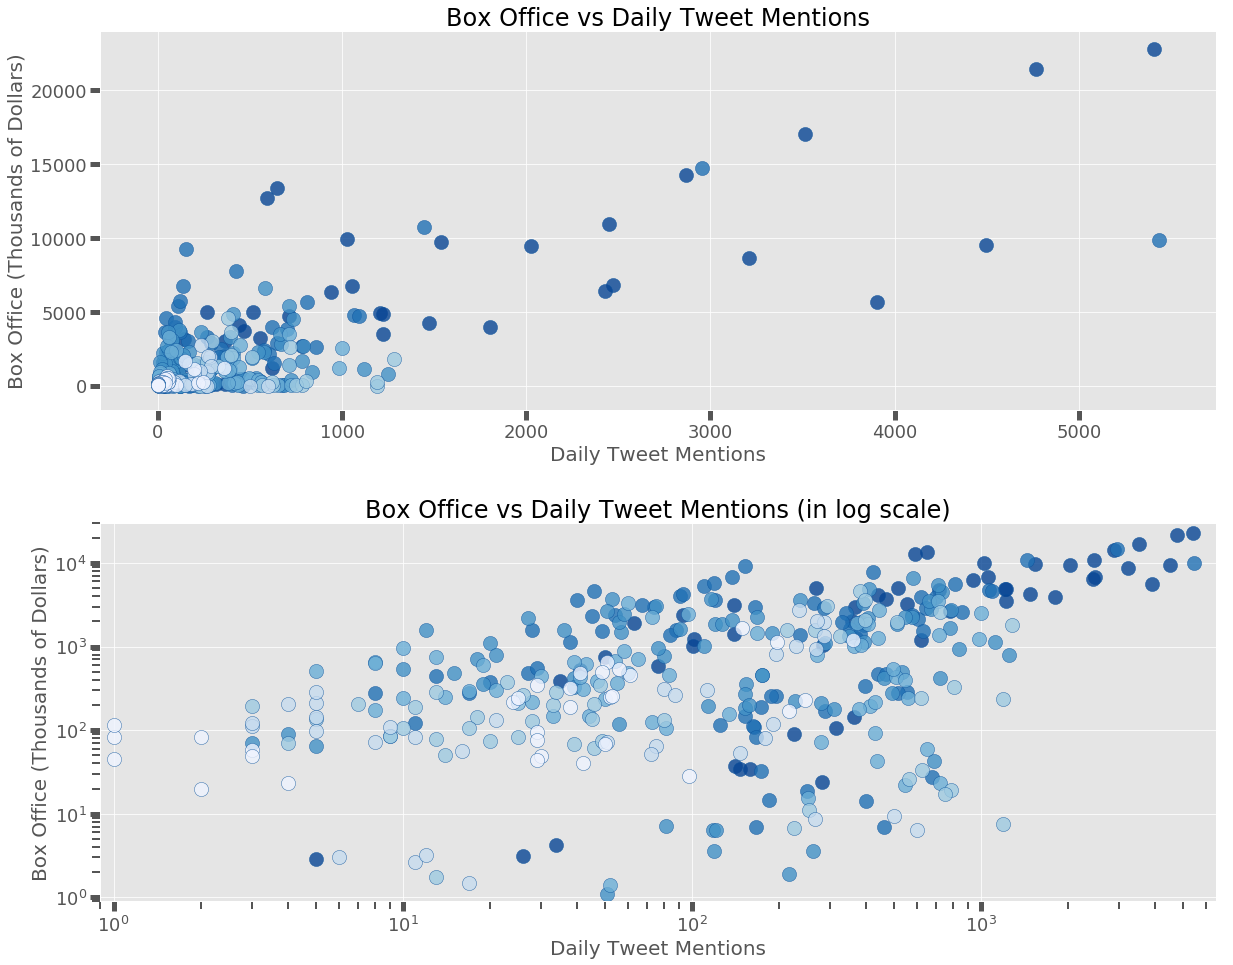

In [11]:
fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

colorlist = ["#084594","#2171b5","#4292c6","#6baed6","#9ecae1","#c6dbef","#eff3ff"]

# Plot the data points for one week at a time
for i in range(7):
    weekly = sevenweeks.loc[(sevenweeks["weeks since release"] == i) , :].reset_index(drop= True)
    x = weekly["daily tweet count"]
    y = weekly["box office"]
    color = colorlist[i]
     
    ax1.scatter(x, y, c = color, edgecolor = "#08519c", s = 200, alpha = 0.8)
    ax2.scatter(x, y, c = color, edgecolor = "#08519c", s = 200, alpha = 0.8)   

figformat(ax1, "Box Office vs Daily Tweet Mentions")
figformat(ax2, "Box Office vs Daily Tweet Mentions (in log scale)")
figformat2(ax2)

plt.subplots_adjust(hspace=0.3)
plt.savefig('analysis_results/sevenweeks_scatterplot.png')

In [12]:
model = regression(sevenweeks)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box office   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     293.3
Date:                Tue, 07 Aug 2018   Prob (F-statistic):          3.64e-113
Time:                        12:46:58   Log-Likelihood:                -3249.5
No. Observations:                 374   AIC:                             6509.
Df Residuals:                     369   BIC:                             6529.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -861.8419    240.127     -3.589      0.000   -1334.031    -389.652
daily tweet count      2.2548      0.119     18.891      0.000       2.020       2.490
days since release   -10.8564      6.740     -1.611      0.108     -24.110       2.397
weekend              838.5094    152.298      5.506      0.000     539.029    1137.990
theaters               0.8926      0.061     14.582      0.000       0.772       1.013
==============================================================================
Omnibus:                      183.377   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2170.178
Skew:                           1.753   Prob(JB):                         0.00
Kurtosis:                      14.268   Cond. No.                     7.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
indep_var = fiveweeks[["daily tweet count","days since release","weekend","theaters"]]
correlation_matrix = np.corrcoef(indep_var, rowvar=0)

#https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels
#determinant of the correlation matrix will "range from 0 (Perfect Collinearity) to 1 (No Collinearity)"
#the condition number of the covariance matrix will approach infinity with perfect linear dependence.

print (f"correlation matrix determinant = {np.linalg.det(correlation_matrix)}")
print (f"condition number of the covariance matrix = {np.linalg.cond(correlation_matrix)}")

correlation matrix determinant = 0.6581452779184637
condition number of the covariance matrix = 3.1386197002554757


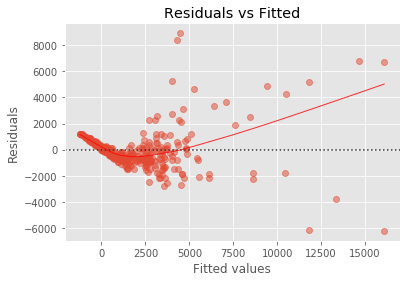

In [14]:
#https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues
model_norm_residuals = model.get_influence().resid_studentized_internal
import seaborn as sns
plot_lm_1 = plt.figure()

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'box office', data=sevenweeks, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

plt.savefig('analysis_results/sevenweeks_regression_residual_vs_fitted.png')

### Nonlinear trend in residual curve implies non-linear relationship between predicators and box office. Funnel shaped residual plot implies non-constant variance, or heteroscedasticity.

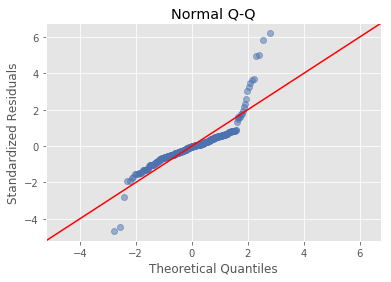

In [15]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
plt.savefig('analysis_results/overallplot five weeks or newer.png')

### upwards curve in QQ-plot implies positive skew, confirmed by a box plot of the box office.

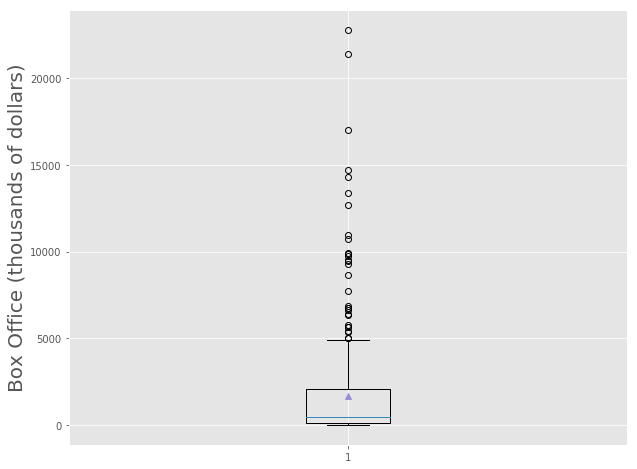

In [16]:
dataset = sevenweeks["box office"]
fig = plt.figure(figsize = (10,8))
plt.boxplot(dataset, showmeans=True) 
plt.ylabel('Box Office (thousands of dollars)',fontsize = 20)

plt.savefig('analysis_results/boxoffice_boxplot.png')
